# Using Convolutional Neural Networks (CNNs) for Image Classification
We're going to do the Dogs vs Cats Kaggle competition from 2013 using the VGG Imagenet model (which won the 2014 Imagenet competition).

In [4]:
# Setting up
%matplotlib inline 

In [5]:
# Define path so we can easily switch between the small sample folder and full dataset
# path = "data/dogscats/"
path = "data/dogscats/sample/"

In [6]:
from __future__ import division, print_function
import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt
import utils; reload(utils)
from utils import plots

# Using a pre-trained model: VGG16

In [8]:
# Large as poss but no larger than 64 recommended (memory limited)
batch_size=64
# Use fastai utility class
from vgg16 import Vgg16
vgg = Vgg16()
# Grab some images for training and validation
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=1)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/1
23000/23000 [==============================] - 765s - loss: 0.1288 - acc: 0.9677 - val_loss: 0.0687 - val_acc: 0.9845


98.5% accuracy! Pretty good. Suspiciously good? Or maybe just fine. From the course notes: 'Doing so should give you very high training and validation accuracy, around 97%.'

Found 16 images belonging to 2 classes.


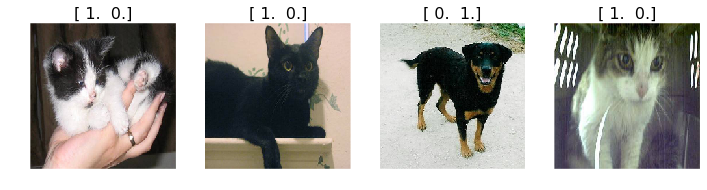

In [7]:
# Let's investigate what vgg does (don't forget to switch path back to sample)
from vgg16 import Vgg16
vgg = Vgg16()
batches = vgg.get_batches(path+'train', batch_size=4)

imgs, labels = next(batches)
plots(imgs, titles=labels)

'One hot encoding' is labels in an array, size of array = number of categories, 1 for the category and zero for rest.

In [8]:
??vgg.predict()
vgg.predict(imgs, True)

(array([ 0.1044,  0.2802,  0.8193,  0.0493], dtype=float32),
 array([333, 285, 234, 370]),
 [u'hamster', u'Egyptian_cat', u'Rottweiler', u'guenon'])